In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.mlab as mpll
import matplotlib as mpl
import pathlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from scipy.stats import chi2_contingency
from scipy import signal as sp
from scipy.stats import pearsonr
from scipy.optimize import curve_fit
from scipy import stats as st
import statistics
import math
from scipy.interpolate import UnivariateSpline # para interpolar
from scipy.signal import find_peaks
plt.rcParams["font.family"] = "serif"

In [ ]:
mu_vacio = 4*np.pi*1e-10
mu_laton = 1
N = 10
D = 0.025 #m
error_D = 2e-5
d = 0.001047 #m
error_d = 1e-6 #m

inductancia = mu_vacio * (mu_laton**2) * (N**2) *D /2 *(np.log(8*D / d) -2)
error_inductancia = (((mu_vacio*(mu_laton**2)* (N**2) *error_D /2 *(np.log(8*D / d) -2)) +  (mu_vacio * (mu_laton**2) * (N**2) *(D /2)*(8*d*error_D /8*D)) )**2 + (mu_vacio * (mu_laton**2) * (N**2) *D /2 *(-d*error_d / 8*D*(d**2)))**2 )**(1/2)

inductancia, error_inductancia

(5.108839806473562e-09, 4.087072667490726e-12)

In [ ]:
resistividad = 1.68e-8
largo = 1.752
diametro = 0.001047 #m
error_largo = 0.001
error_diametro = 1e-6
area = np.pi * ((diametro /2)**2)
error_area = np.pi *2 * (diametro /2) * error_diametro

resistencia = resistividad * largo /area
error_resistencia = ((resistividad *error_largo / area)**2 + (-resistividad* largo*error_area / (area**2))**2 ) ** (1/2)

resistencia, error_resistencia

(0.0341869328421103, 0.00013205869369617784)

# Resistencia del alambre

Dejando fija una $R_0$, haciendo un barrido de voltaje de entrada $V_0$ y midiendo la caida de tension sobre los extremos del cable $V$ podemos aproximar la resistencia que ofrece el alambre $R$

In [ ]:
def cargar_datos_csv(archivo):
    data = pd.read_csv(archivo, skiprows=1, delimiter=",", decimal=".", header=None)
    entrada = np.asarray(data[0]) #generador
    salida = np.asarray(data[1]) #lock in
    degrees = np.asarray(data[2])
    sensitivity = np.asarray(data[3])
    time_constant = np.asarray(data[4])
    return entrada, salida

In [ ]:
voltaje_in, voltaje_out = cargar_datos_csv("Clase 1 - Voltajes - Hoja 1.csv")

resistencia0 = 1000.37 #ohm
voltaje_in = voltaje_in / 1000 #Vrms
voltaje_out = voltaje_out / 1000000 #Vrms

#resistencia = (resistencia0* voltaje)/ voltaje0
resistencia = resistencia0 / ((voltaje_in/voltaje_out) -1)
np.mean(resistencia), np.std(resistencia)

voltaje_in, voltaje_out

(array([0.01, 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ]),
 array([7.3540e-06, 2.7210e-05, 4.5460e-05, 7.4150e-05, 1.0175e-04,
        1.5174e-04, 1.6288e-04, 1.8439e-04, 2.0460e-04, 2.9090e-04,
        3.0860e-04]))

<ErrorbarContainer object of 3 artists>

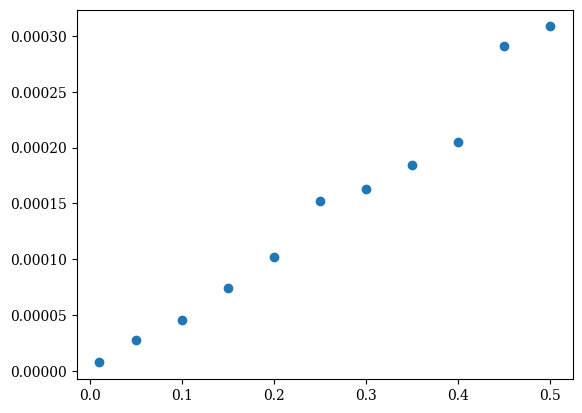

In [ ]:
plt.errorbar(voltaje_in, voltaje_out, fmt = "o")

Alimentando al circuito con hasta 1V podemos aprovechar el lock in para levantar una curva de voltajes pequenos. Sospechamos que como la resistencia fija es grande la caida de tension sobre las puntas del alambre sera chica.

Sacamos cuanto resiste el cable!

# Impedancia del alambre y dependencia con la frecuencia

Como el cable es un conductor y no esta idealmente estirado tiene una componente inductiva. Haciendo un barrido en frecuencias queremos ver el comportamiento reactivo de la impedancia del alambre $Z$

In [ ]:
frecuencia =
inductancia =
corriente =

impedancia = corriente*frecuencia*inductancia + resistencia

SyntaxError: invalid syntax (<ipython-input-6-2d4c0c05059b>, line 1)

El lock in genera dos senales en cuadratura X e Y (proporcionales a un seno y coseno) que son la de referencia y la medida. Si estamos a $\phi$=0 tal que esten en fase, solo deberiamos ver voltaje en X

In [ ]:
def cargar_datos_txt(archivo):
    data = pd.read_csv(archivo, skiprows=1, delimiter=",", decimal=".", header=None)
    entrada = np.asarray(data[0]) #generador
    salida = np.asarray(data[3]) #lock in
    return entrada, salida

In [ ]:
voltaje_in2, voltaje_out2 = cargar_datos_txt("medicion_volt322025.txt")
voltaje_in3, voltaje_out3 = cargar_datos_txt("medicion_100Hzbarridovolt.txt")

In [ ]:
resistencia2 = 1000.37 / ((voltaje_in2/voltaje_out2)-1)
np.mean(resistencia2)

0.2919448780594722

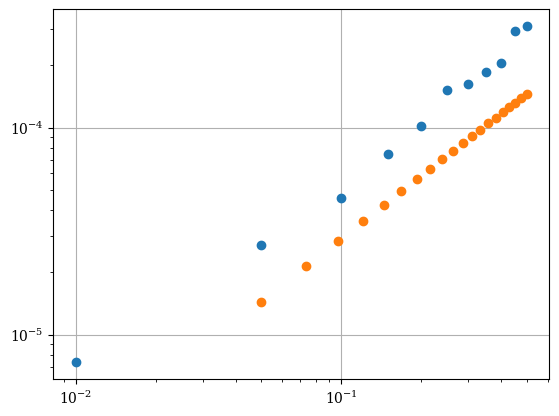

In [ ]:
plt.errorbar(voltaje_in, voltaje_out, fmt = "o")
plt.errorbar(voltaje_in2, voltaje_out2, fmt = "o")
plt.grid()
plt.xscale("log")
plt.yscale("log")

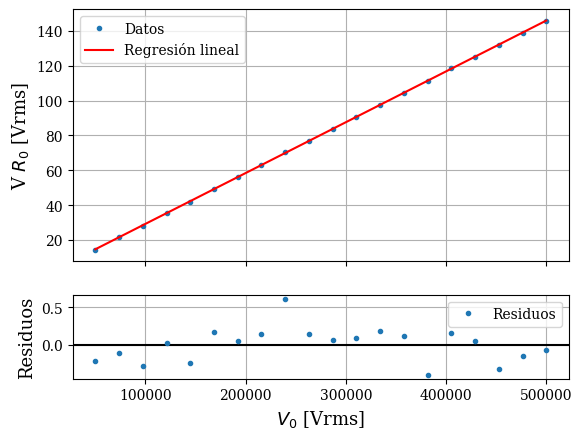

(0.00029172328207837766, 3.9387726512611575e-07)

In [ ]:
def lineal(x, m, b):
    return m * x +b

x = voltaje_in2*1000000
y = voltaje_out2*resistencia0*1000

p_opt, p_cov = curve_fit(lineal, x, y)
m_optimo = p_opt[0]
b_optimo = p_opt[1]
b_error = p_cov[1,1]**0.5
m_error = p_cov[0,0]**0.5

m_optimo,m_error #pendiente y error

y_predicho = lineal(x,np.array(m_optimo),np.array(b_optimo)) #lineal
residuos = y - y_predicho


x2 = x
y2 = y
error_x2 = []
error_y2 = []

for i in range(len(y2)):
    error_y2.append(y2[i]*0.01+(1/2.28))
    error_x2.append(x2[i]*0.01)

error_x2 = error_x2*1000000
error_y2 = error_y2*1000

#grafiquemos

fig, ax = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': [3, 1]})


ax[0].errorbar(x, y,  fmt = ".", capsize = 3, label = "Datos")
ax[0].errorbar(x, y_predicho, label="Regresión lineal", color = "red")
ax[1].errorbar(x, residuos, fmt = ".", label = "Residuos")

# plt.xlabel("Título x []", fontsize = 15)
# plt.ylabel("Título y []", fontsize = 15)

ax[0].set_ylabel("V $R_0$ [Vrms]", fontsize = 13)
ax[1].set_ylabel("Residuos", fontsize = 13)
ax[1].set_xlabel("$V_0$ [Vrms]", fontsize = 13)
# ax[1].set_ylim(-0.05, 0.05)

# major_ticks = np.arange(x[0], x[len(x)-1], 0.05 )
# minor_ticks = np.arange(x[0], x[len(x)-1], 0.05)

# ax[0].set_xticks(major_ticks)
# ax[0].set_xticks(minor_ticks, minor=True)
# ax[0].grid(which='minor', alpha=0.2)
# ax[0].grid(which='major', alpha=0.6)

ax[1].axhline(0, color = "black")
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
plt.show()

m_optimo, m_error

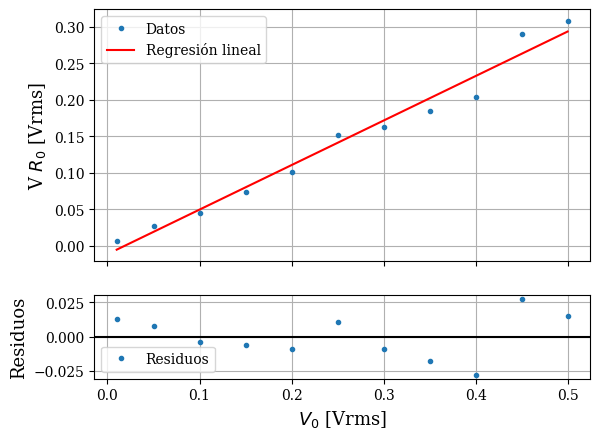

(0.6098619173306522, 0.032976229867582085)

In [ ]:
def lineal(x, m, b):
    return m * x +b

x = voltaje_in
y = voltaje_out*resistencia0
xerr = 0
yerr = 0

p_opt, p_cov = curve_fit(lineal, x, y)
m_optimo = p_opt[0]
b_optimo = p_opt[1]
b_error = p_cov[1,1]**0.5
m_error = p_cov[0,0]**0.5

m_optimo,m_error #pendiente y error

y_predicho = lineal(x,np.array(m_optimo),np.array(b_optimo)) #lineal
residuos = y - y_predicho


#grafiquemos

fig, ax = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': [3, 1]})


ax[0].errorbar(x, y, fmt = ".", capsize = 3, label = "Datos")
ax[0].errorbar(x, y_predicho, label="Regresión lineal", color = "red")
ax[1].errorbar(x, residuos, fmt = ".", label = "Residuos")

# plt.xlabel("Título x []", fontsize = 15)
# plt.ylabel("Título y []", fontsize = 15)

ax[0].set_ylabel("V $R_0$ [Vrms]", fontsize = 13)
ax[1].set_ylabel("Residuos", fontsize = 13)
ax[1].set_xlabel("$V_0$ [Vrms]", fontsize = 13)
# ax[1].set_ylim(-0.05, 0.05)

# major_ticks = np.arange(x[0], x[len(x)-1], 0.05 )
# minor_ticks = np.arange(x[0], x[len(x)-1], 0.05)

# ax[0].set_xticks(major_ticks)
# ax[0].set_xticks(minor_ticks, minor=True)
# ax[0].grid(which='minor', alpha=0.2)
# ax[0].grid(which='major', alpha=0.6)

ax[1].axhline(0, color = "black")
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
plt.show()

m_optimo, m_error

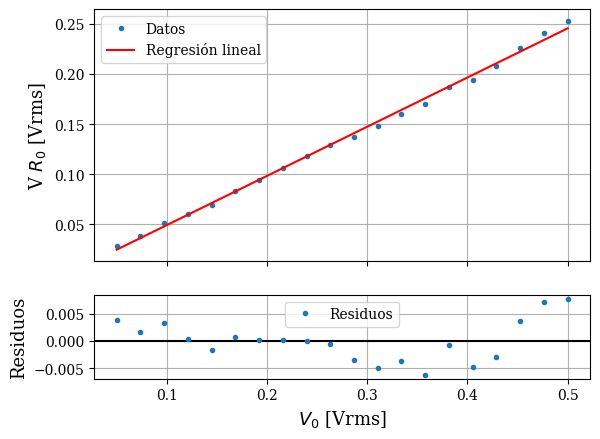

(0.4912546909451968, 0.006397938080529785)

In [ ]:
def lineal(x, m, b):
    return m * x +b

x = voltaje_in3
y = voltaje_out3*resistencia0
xerr = 0
yerr = 0

p_opt, p_cov = curve_fit(lineal, x, y)
m_optimo = p_opt[0]
b_optimo = p_opt[1]
b_error = p_cov[1,1]**0.5
m_error = p_cov[0,0]**0.5

m_optimo,m_error #pendiente y error

y_predicho = lineal(x,np.array(m_optimo),np.array(b_optimo)) #lineal
residuos = y - y_predicho


#grafiquemos

fig, ax = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios': [3, 1]})


ax[0].errorbar(x, y, fmt = ".", capsize = 3, label = "Datos")
ax[0].errorbar(x, y_predicho, label="Regresión lineal", color = "red")
ax[1].errorbar(x, residuos, fmt = ".", label = "Residuos")

# plt.xlabel("Título x []", fontsize = 15)
# plt.ylabel("Título y []", fontsize = 15)

ax[0].set_ylabel("V $R_0$ [Vrms]", fontsize = 13)
ax[1].set_ylabel("Residuos", fontsize = 13)
ax[1].set_xlabel("$V_0$ [Vrms]", fontsize = 13)
# ax[1].set_ylim(-0.05, 0.05)

# major_ticks = np.arange(x[0], x[len(x)-1], 0.05 )
# minor_ticks = np.arange(x[0], x[len(x)-1], 0.05)

# ax[0].set_xticks(major_ticks)
# ax[0].set_xticks(minor_ticks, minor=True)
# ax[0].grid(which='minor', alpha=0.2)
# ax[0].grid(which='major', alpha=0.6)

ax[1].axhline(0, color = "black")
ax[0].grid()
ax[1].grid()
ax[0].legend()
ax[1].legend()
plt.show()

m_optimo, m_error

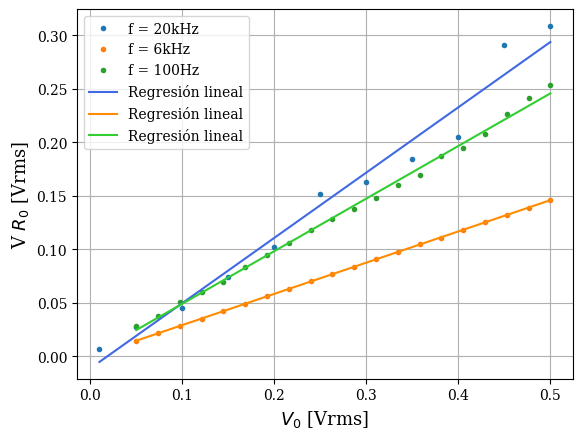

In [ ]:
x1 = voltaje_in
y1 = voltaje_out*resistencia0
x2 = voltaje_in2
y2 = voltaje_out2*resistencia0
x3 = voltaje_in3
y3 = voltaje_out3*resistencia0

error_x2 = []
error_y2 = []

for i in range(len(y2)):
    error_y2.append(y2[i]*0.01+(1/2.28))
    error_x2.append(x2[i]*0.01)

error_x3 = []
error_y3 = []

for i in range(len(y3)):
    error_y3.append(y3[i]*0.01+(1/2.28))
    error_x3.append(x3[i]*0.01)


p_opt1, p_cov1 = curve_fit(lineal, x1, y1)
m_optimo1 = p_opt1[0]
b_optimo1 = p_opt1[1]
b_error1 = p_cov1[1,1]**0.5
m_error1 = p_cov1[0,0]**0.5
y_predicho1 = lineal(x1,np.array(m_optimo1),np.array(b_optimo1))

p_opt2, p_cov2 = curve_fit(lineal, x2, y2)
m_optimo2 = p_opt2[0]
b_optimo2 = p_opt2[1]
b_error2 = p_cov2[1,1]**0.5
m_error2 = p_cov2[0,0]**0.5
y_predicho2 = lineal(x2,np.array(m_optimo2),np.array(b_optimo2))

p_opt3, p_cov3 = curve_fit(lineal, x3, y3)
m_optimo3 = p_opt3[0]
b_optimo3 = p_opt3[1]
b_error3 = p_cov3[1,1]**0.5
m_error3 = p_cov3[0,0]**0.5
y_predicho3 = lineal(x3,np.array(m_optimo3),np.array(b_optimo3))

plt.errorbar(x1, y1, fmt = ".", label = "f = 20kHz", capsize = 4)
plt.errorbar(x2, y2, fmt = ".", label = "f = 6kHz", capsize = 4)
plt.errorbar(x3, y3, fmt = ".", label = "f = 100Hz", capsize = 4)
plt.errorbar(x1, y_predicho1, label="Regresión lineal", color = "#4169E1")
plt.errorbar(x2, y_predicho2, label="Regresión lineal", color = "#FF8C00")
plt.errorbar(x3, y_predicho3, label="Regresión lineal", color = "#32CD32")

plt.xlabel("$V_0$ [Vrms]", fontsize = 13)
plt.ylabel("V $R_0$ [Vrms]", fontsize = 13)
plt.legend()
plt.grid()
plt.show()